   YEAR  MON SEASON  MM_TYPE        EUS       GUS         WUS
0  2024   12     겨울  공동주택관리소  548480228   8221238  20262147.7
1  2024   12     겨울       기업  633735769  30096486   4448777.4
2  2024   12     겨울       개인  134828126  42103424   7326853.6
3  2024   12     겨울     공공기관  152992881   3814815      896842
4  2024   12     겨울       학교  164092999   4362563     1858841
5  2025    1     겨울       개인  293836031  64743317  14290250.9
6  2025    1     겨울     공공기관  159137367   5245062   1109496.9
7  2025    1     겨울  공동주택관리소  549306970  12897492  19747538.2
8  2025    1     겨울     종교단체    9663487    538785       45011
9  2025    1     겨울       기업  624104890  58727315   4215302.2


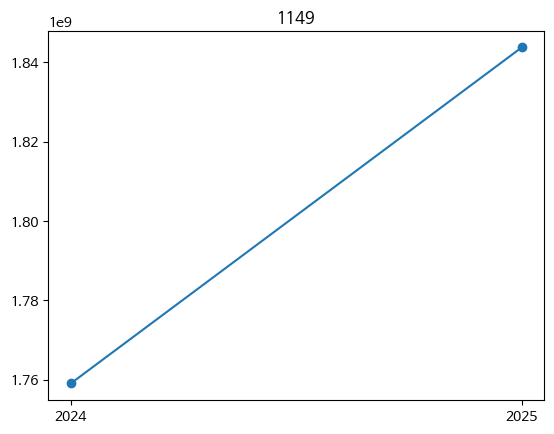

In [5]:
import requests
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt

date_list = []
energyUseDataSummaryInfo = []

## 시작일 종료일 지정
start_date = datetime.date(2024, 12, 1)
end_date = datetime.date(2025, 1, 1)

## 시작일 종료일 기준으로 배열 생성
current_date = start_date
while current_date <= end_date:
    date_list.append(current_date.strftime("%Y/%m"))
    current_date += datetime.timedelta(days=31)

## 월별 데이터 호출 함수
def getEnergyUseDataSummaryInfo(date):
    try:
        result = []
        url = f"http://openapi.seoul.go.kr:8088/694249774a6b6f6234394856624c73/json/energyUseDataSummaryInfo/1/5/{date}"

        ## URL 및 파라미터 전송
        response = requests.get(url)

        ## JSON 데이터 읽기
        data = response.json()

        ## 객체 접근
        result = data["energyUseDataSummaryInfo"]["row"]

    except requests.exceptions.RequestException as e:
        print(f"API 호출 실패: {e}")
    except json.JSONDecodeError as e:
        print(f"JSON 파싱 실패: {e}")
    except:
        print("error")
        pass
    return result
## 개절 구분 함수
def getSeason(month):
    if month in [3, 4, 5]:
        return "봄"
    elif month in [6, 7, 8]:
        return "여름"
    elif month in [9, 10, 11]:
        return "가을"
    else:
        return "겨울"
try:
    ## 데이터 변수에 저장
    [energyUseDataSummaryInfo.extend(getEnergyUseDataSummaryInfo(date)) for date in date_list]
    #### 1-1
    #694249774a6b6f6234394856624c73


    #### 1-2
    # print(energyUseDataSummaryInfo)
    # print(date_list)

    #### 2-1
    df = pd.DataFrame(energyUseDataSummaryInfo)
    # print(df)
    #### 2-2
    df["YEAR"] = df["YEAR"].astype(int)
    df["MON"] = df["MON"].astype(int)
    df["SEASON"] = df["MON"].apply(getSeason)
    print(df[["YEAR", "MON", "SEASON", "MM_TYPE", "EUS", "GUS", "WUS"]])

    #### 3-1
    ## 한글 처리를 위한 matplotlib 설정 (1)
    # !sudo apt-get install -y fonts-nanum
    # !sudo fc-cache –fv
    # !rm ~/.cache/matplotlib -rf

    ## 한글 처리를 위한 matplotlib 설정 (2)
    # plt.rc('font', family='NanumBarunGothic')

    df = pd.DataFrame(energyUseDataSummaryInfo)

    # 숫자로 변환
    for col in ['EUS', 'GUS', 'WUS', 'HUS']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # 합산
    df['TOTAL_USE'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']
    yearly_total = df.groupby('YEAR')['TOTAL_USE'].sum().reset_index()

    # 제목설정
    plt.title('1149')

    # 시각화
    plt.plot(yearly_total['YEAR'], yearly_total['TOTAL_USE'], marker='o')
    plt.show()

    #### 3-2


except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")
except:
    print("error")
    pass